In [1]:
# loading the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from fancyimpute import KNN
import warnings
warnings.filterwarnings('ignore')
from geopy.distance import geodesic
from geopy.distance import great_circle
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt

Using TensorFlow backend.


In [2]:
train = pd.read_csv('E:/Sproject/train_cab.csv',dtype={'fare_amount':np.float64},na_values={'fare_amount':'430-'})

In [3]:
j = train

In [4]:
test = pd.read_csv("E:/Sproject/test.csv")

In [5]:
 k = test

In [7]:
j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(6), object(1)
memory usage: 878.7+ KB


In [8]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [9]:
# as pickup_datetime is in object datatype , we are converting it into date-time format
m = [j,k]

for i in m:
    i['pickup_datetime'] = pd.to_datetime(i['pickup_datetime'],errors='coerce')

# Data Visualisation

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# setting up the sns for plots
sns.set(style='darkgrid',palette='Set1')

# Histogram Plots

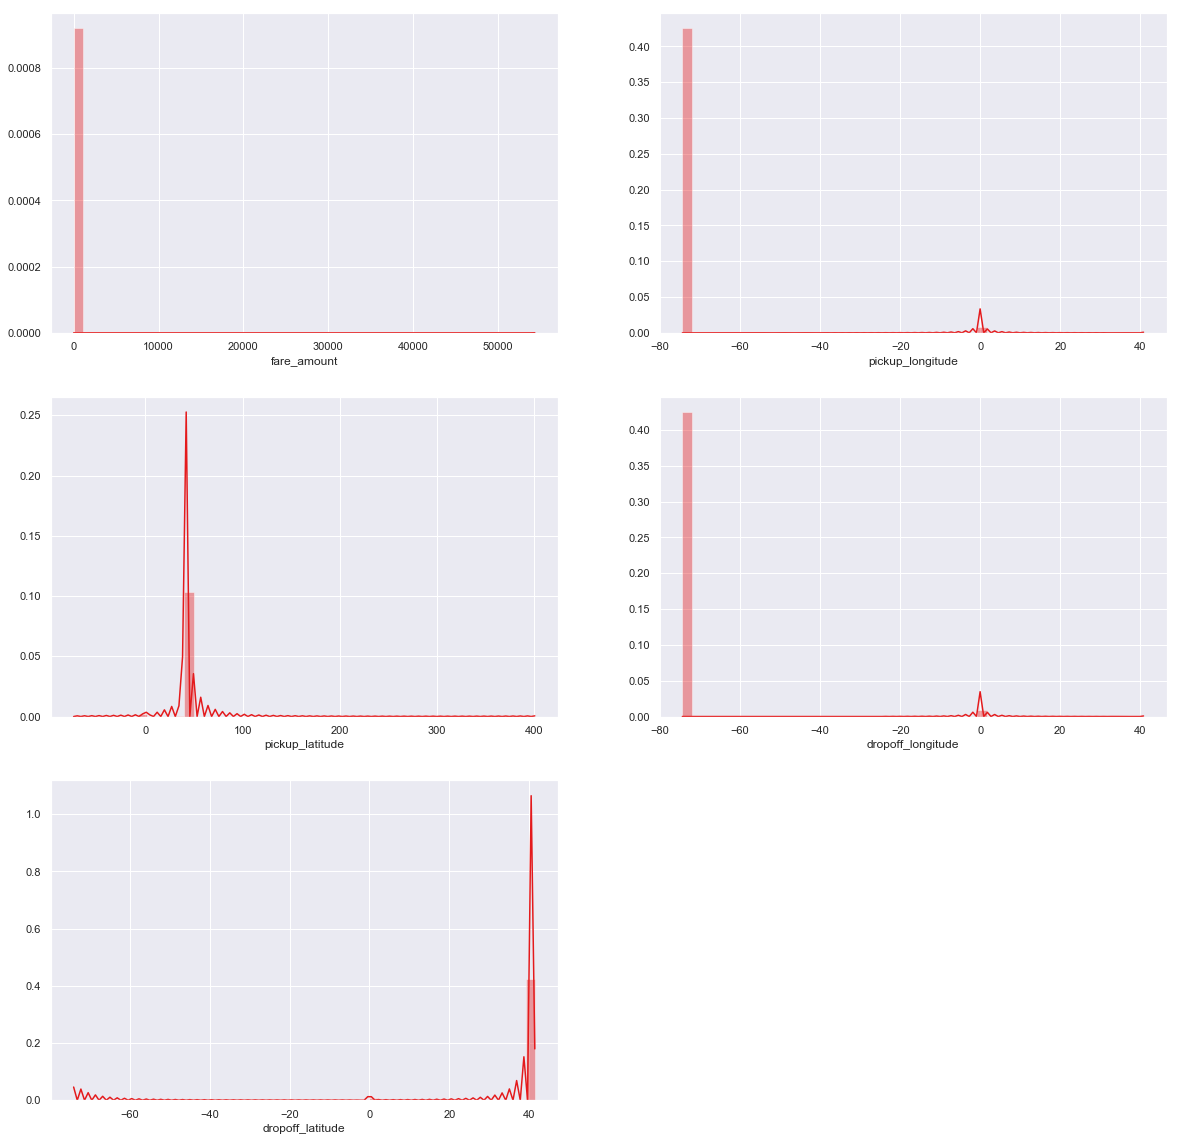

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(321)
_ = sns.distplot(j['fare_amount'],bins=50)
plt.subplot(322)
_ = sns.distplot(j['pickup_longitude'],bins=50)
plt.subplot(323)
_ = sns.distplot(j['pickup_latitude'],bins=50)
plt.subplot(324)
_ = sns.distplot(j['dropoff_longitude'],bins=50)
plt.subplot(325)
_ = sns.distplot(j['dropoff_latitude'],bins=50)
plt.show()

# Violin Plots

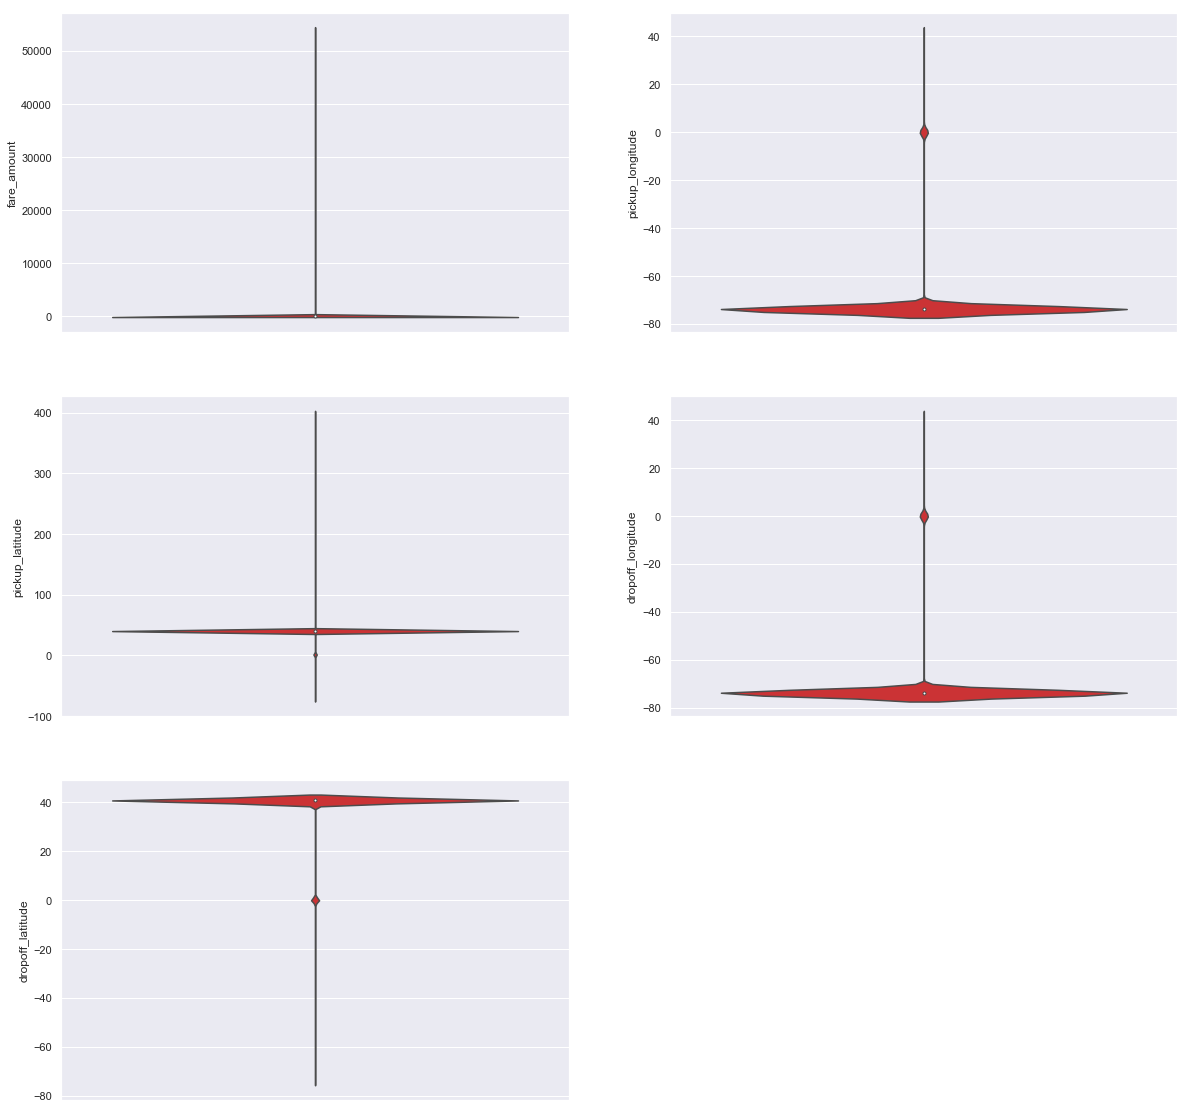

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(321)
_ = sns.violinplot(y='fare_amount',data=j)
plt.subplot(322)
_ = sns.violinplot(y='pickup_longitude',data=j)
plt.subplot(323)
_ = sns.violinplot(y='pickup_latitude',data=j)
plt.subplot(324)
_ = sns.violinplot(y='dropoff_longitude',data=j)
plt.subplot(325)
_ = sns.violinplot(y='dropoff_latitude',data=j)
plt.savefig('violin.png')
plt.show()

# Exploratory Data Analysis

In [15]:
j['fare_amount']<1

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
16037    False
16038    False
16039    False
16040    False
16041    False
16042    False
16043    False
16044    False
16045    False
16046    False
16047    False
16048    False
16049    False
16050    False
16051    False
16052    False
16053    False
16054    False
16055    False
16056    False
16057    False
16058    False
16059    False
16060    False
16061    False
16062    False
16063    False
16064    False
16065    False
16066    False
Name: fare_amount, Length: 16067, dtype: bool

In [16]:
sum(j['fare_amount']<1)

5

In [17]:
j[j['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10,-73.995062,40.740755,-73.995885,40.741357,4.0


In [18]:
#remove the values below 1

j = j.drop(j[j['fare_amount']<1].index, axis=0)

In [19]:
 for i in range(4,11):
    print('passenger_count above' +str(i)+'={}'.format(sum(j['passenger_count']>i)))

passenger_count above4=1367
passenger_count above5=322
passenger_count above6=20
passenger_count above7=20
passenger_count above8=20
passenger_count above9=20
passenger_count above10=20


these are observations in passenger_count variable whose values are greater than 4 and less than 11

In [20]:
# as maximum capacity for passenger_count in a cab is 6 , so we are taking values below 6
j[j['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50,-73.988977,40.721068,-73.982368,40.732064,345.0


In [21]:
#checking for negative values in passenger_count

j[j['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,2015-06-02 23:16:15,-73.974899,40.751095,-73.908546,40.881878,0.00
566,4.9,2012-01-28 21:33:18,-73.955322,40.782840,-73.955797,40.773673,0.00
678,6.5,2012-02-27 07:24:20,-73.983397,40.738183,-73.971395,40.758023,0.00
1160,13.3,2011-05-25 23:58:48,-73.998360,40.740348,-73.946455,40.777348,0.00
1935,10.1,2011-10-23 11:09:28,-73.971400,40.795000,-73.967900,40.768600,0.00
2200,8.1,2011-05-23 16:54:19,-73.988008,40.748303,-74.005185,40.738733,0.00
2425,8.9,2011-11-25 22:47:33,-73.999900,40.738600,-73.971800,40.746300,0.00
3034,5.7,2011-03-06 12:03:14,-73.986557,40.745783,-73.994545,40.729995,0.00
3413,7.3,2011-02-28 06:39:16,-73.973413,40.743708,-73.985220,40.741583,0.00
3481,11.3,2011-11-30 17:23:02,-73.968100,40.762500,-73.984400,40.760900,0.00


In [22]:
# as passenger_count is object we cannot use sum() , insted we can use len()

len(j[j['passenger_count']<1])



58

Removing values greater than 6 and less than 1 from passenger_count variable

In [23]:
j = j.drop(j[j['passenger_count']>6].index, axis=0)


In [24]:
j = j.drop(j[j['passenger_count']<1].index, axis=0)

In [25]:
print('pickup_longitude above 180={}'.format(sum(j['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(j['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(j['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(j['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(j['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(j['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(j['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(j['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [26]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(j[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [27]:
#above values which are equal to 0 has to be removed
j = j.drop(j[j['pickup_latitude']>90].index, axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    j = j.drop(j[j[i]==0].index, axis=0)

In [28]:
d = j

# Missing Value Analysis

In [29]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(j.isnull().sum())
missing_val = missing_val.reset_index()
 

In [30]:
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


according to missing value analysis , the variables whose values are missing, greater than 30 % , those values are needed to be impute . Here fare_amount and passenger_count variables needed to be imputed

In [31]:
#Missing percentage
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
 

In [32]:
missing_val

,Variables,Missing_percentage
0,passenger_count,0.342317
1,fare_amount,0.136927
2,pickup_datetime,0.006224
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


There are 3 types of methods to predict the missing values.

1. MEAN method
2.MEDIAN method
3.KNN

We need to decide which method is suitable for our dataset , for that we are randomly taking
actual value of a observation of passenger count , fare_amount variables and check the predicted values
of above 3 methods with actual value and decide which method is suitable.

In [33]:
 
j['passenger_count'].loc[121] #Actual value = 1

1.0

In [34]:
#Replacing the actual value with NAN
 
j['passenger_count'].loc[121] = np.nan
j['passenger_count'].loc[121]

nan

In [35]:
j['fare_amount'].loc[121] #Actual value = 4

4.0

In [36]:
j['fare_amount'].loc[121] = np.nan

In [37]:
#Impute with mean
j['fare_amount'].fillna(j['fare_amount'].mean()).loc[121] # mean value = 15.11

15.118387901265997

In [38]:
j['fare_amount'].fillna(j['fare_amount'].median()).loc[121] #median value = 8.5

8.5

In [39]:
pickup_datetime=pd.DataFrame(j['pickup_datetime'])

In [40]:
columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [41]:
#Here we are choosing KNN imputation with k = 19 (k should be always a odd number)
j = pd.DataFrame(KNN(k = 19).fit_transform(j.drop('pickup_datetime',axis=1)),columns=columns, index=j.index)

Imputing row 1/15661 with 0 missing, elapsed time: 75.781
Imputing row 101/15661 with 0 missing, elapsed time: 76.717
Imputing row 201/15661 with 0 missing, elapsed time: 76.729
Imputing row 301/15661 with 0 missing, elapsed time: 76.736
Imputing row 401/15661 with 0 missing, elapsed time: 76.739
Imputing row 501/15661 with 0 missing, elapsed time: 76.744
Imputing row 601/15661 with 0 missing, elapsed time: 76.751
Imputing row 701/15661 with 0 missing, elapsed time: 76.758
Imputing row 801/15661 with 0 missing, elapsed time: 76.763
Imputing row 901/15661 with 0 missing, elapsed time: 76.771
Imputing row 1001/15661 with 0 missing, elapsed time: 76.773
Imputing row 1101/15661 with 0 missing, elapsed time: 76.775
Imputing row 1201/15661 with 0 missing, elapsed time: 76.776
Imputing row 1301/15661 with 0 missing, elapsed time: 76.778
Imputing row 1401/15661 with 0 missing, elapsed time: 76.784
Imputing row 1501/15661 with 0 missing, elapsed time: 76.787
Imputing row 1601/15661 with 0 missi

In [42]:
j.loc[121]

fare_amount           5.010482
pickup_longitude    -73.993701
pickup_latitude      40.741569
dropoff_longitude   -73.987999
dropoff_latitude     40.748834
passenger_count       2.149101
Name: 121, dtype: float64

In [43]:
j['passenger_count']=j['passenger_count'].astype('int')

In [44]:
j['passenger_count']=j['passenger_count'].round().astype('object').astype('category',ordered=True)

In [45]:
#Create dataframe with missing percentage
missing_val1 = pd.DataFrame(pickup_datetime.isnull().sum())
missing_val1 = missing_val1.reset_index() 

In [46]:
missing_val1

,index,0
0,pickup_datetime,1


In [47]:
d = j

# Outliner Analysis

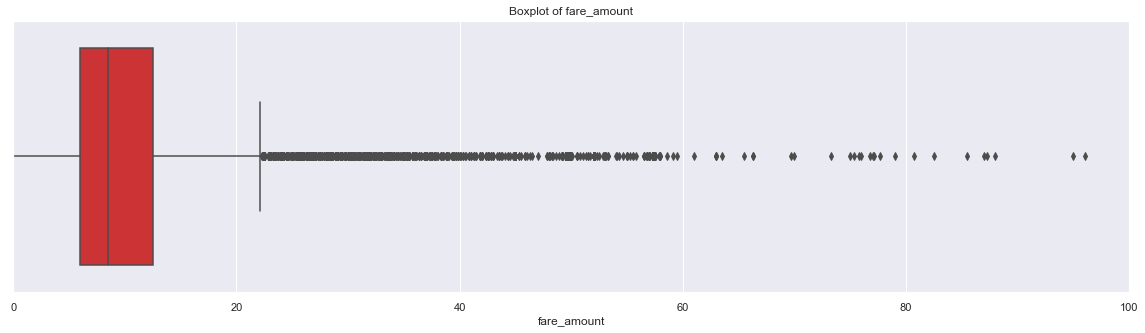

In [48]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'],data=train,orient='h')
plt.title('Boxplot of fare_amount')
 
plt.show()

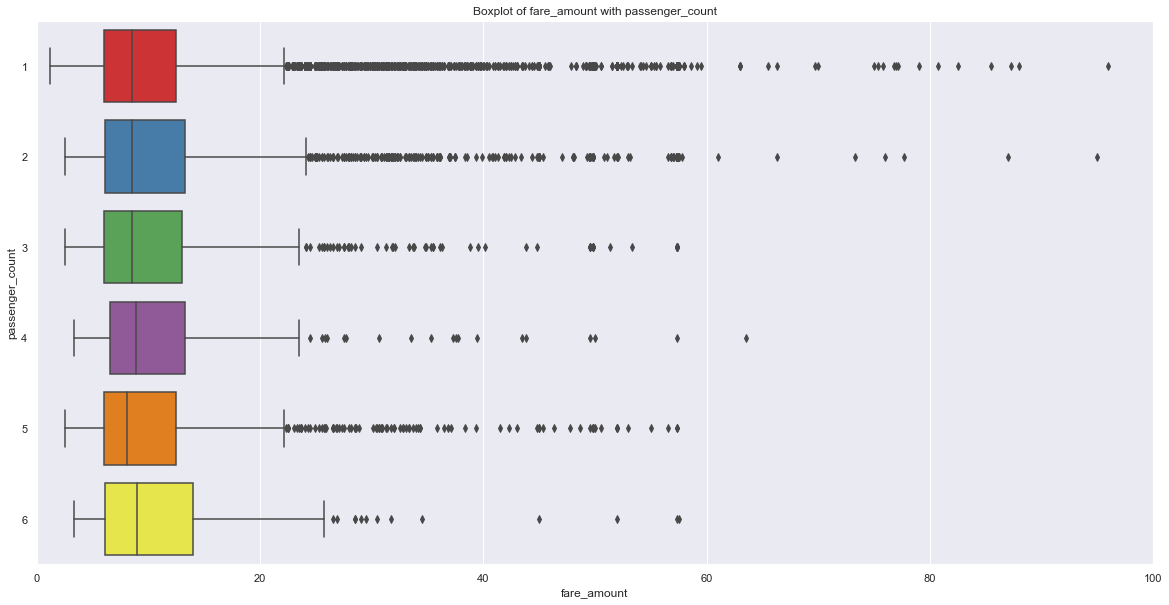

In [49]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=j['fare_amount'],y=j['passenger_count'],data=j,orient='h')
plt.title('Boxplot of fare_amount with passenger_count')
 
plt.show()

In [52]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(j[col], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    j.loc[j[col] < minimum,col] = np.nan
    j.loc[j[col] > maximum,col] = np.nan

In [53]:
# for i in num_var:
    outlier_treatment('fare_amount')
#     outlier_treatment('pickup_longitude')
#     outlier_treatment('pickup_latitude')
#     outlier_treatment('dropoff_longitude')
#     outlier_treatment('dropoff_latitude')

12.5 6.0
-3.75 22.25


In [54]:
j.std()

fare_amount          4.136037
pickup_longitude     2.659050
pickup_latitude      2.613305
dropoff_longitude    2.710835
dropoff_latitude     2.632400
passenger_count      1.264322
dtype: float64

In [55]:
#Imputing with missing values using KNN
j = pd.DataFrame(KNN(k = 3).fit_transform(j), columns = j.columns, index=j.index)

Imputing row 1/15661 with 0 missing, elapsed time: 71.316
Imputing row 101/15661 with 0 missing, elapsed time: 71.333
Imputing row 201/15661 with 0 missing, elapsed time: 71.335
Imputing row 301/15661 with 1 missing, elapsed time: 71.336
Imputing row 401/15661 with 0 missing, elapsed time: 71.338
Imputing row 501/15661 with 0 missing, elapsed time: 71.339
Imputing row 601/15661 with 1 missing, elapsed time: 71.341
Imputing row 701/15661 with 0 missing, elapsed time: 71.342
Imputing row 801/15661 with 0 missing, elapsed time: 71.344
Imputing row 901/15661 with 0 missing, elapsed time: 71.345
Imputing row 1001/15661 with 0 missing, elapsed time: 71.346
Imputing row 1101/15661 with 1 missing, elapsed time: 71.348
Imputing row 1201/15661 with 0 missing, elapsed time: 71.349
Imputing row 1301/15661 with 0 missing, elapsed time: 71.350
Imputing row 1401/15661 with 0 missing, elapsed time: 71.352
Imputing row 1501/15661 with 0 missing, elapsed time: 71.353
Imputing row 1601/15661 with 0 missi

Imputing row 15601/15661 with 0 missing, elapsed time: 71.740


pd.DataFrame(j.isnull().sum())

In [57]:
j.std()

fare_amount          4.476911
pickup_longitude     2.659050
pickup_latitude      2.613305
dropoff_longitude    2.710835
dropoff_latitude     2.632400
passenger_count      1.264322
dtype: float64

In [58]:
j['passenger_count']=j['passenger_count'].astype('int').round().astype('object').astype('category')

In [59]:
df = j

# stripping the  year , hour , day from timeseries variable i.e pickup_datetime (Feature Extraction)

In [62]:
# we will Join 2 Dataframes pickup_datetime and train
j = pd.merge(pickup_datetime,j,right_index=True,left_index=True)
 

In [63]:
j.shape

(15661, 7)

In [64]:
j.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [65]:
j=j.reset_index(drop=True)

In [66]:
j.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [67]:
pd.DataFrame(j.isna().sum())

,0
pickup_datetime,1
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [68]:
j=j.dropna()

In [69]:
data = [j,k]
for i in data:
    i["year"] = i["pickup_datetime"].apply(lambda row: row.year)
    i["month"] = i["pickup_datetime"].apply(lambda row: row.month)
 
    i["day_of_week"] = i["pickup_datetime"].apply(lambda row: row.dayofweek)
    i["hour"] = i["pickup_datetime"].apply(lambda row: row.hour)

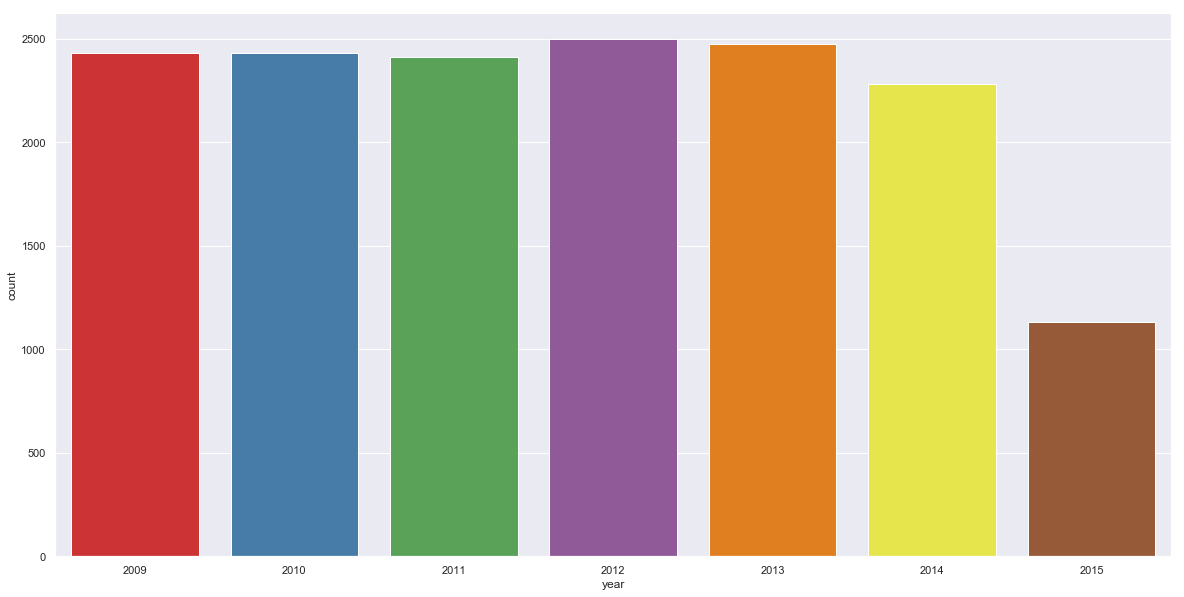

In [70]:
plt.figure(figsize=(20,10))
sns.countplot(j['year'])
 

 

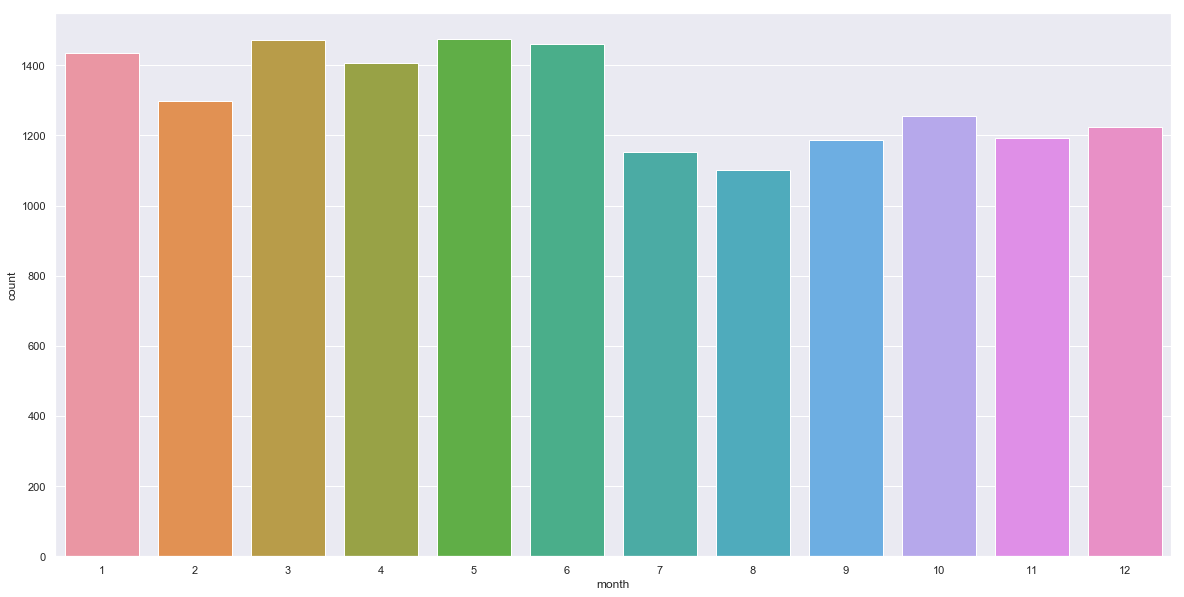

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(j['month'])
   


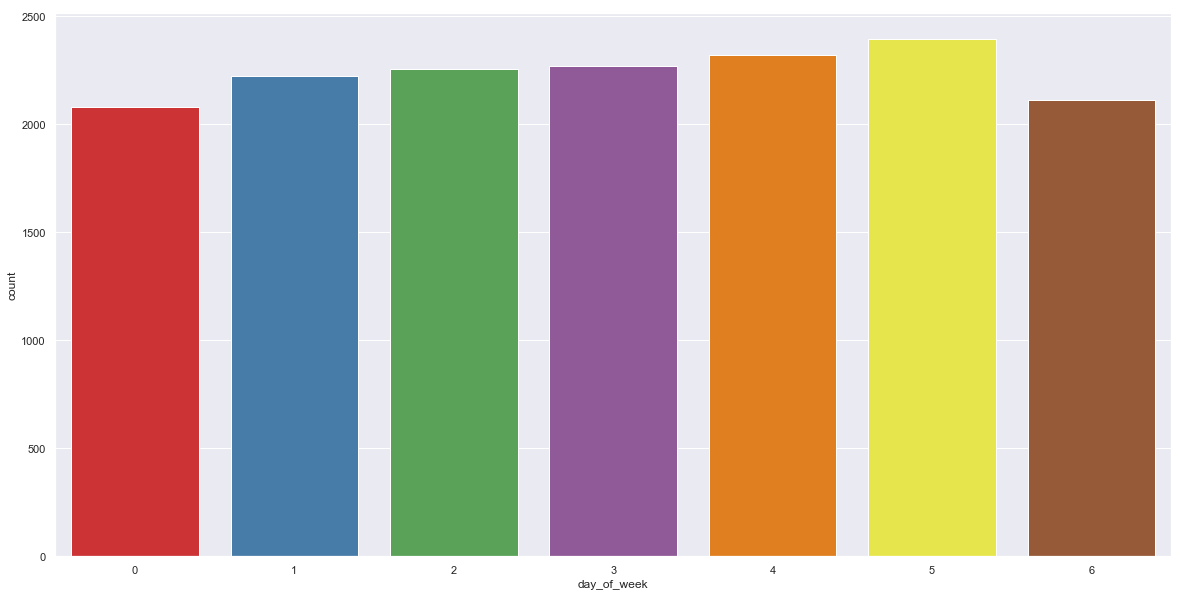

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(j['day_of_week'])
 

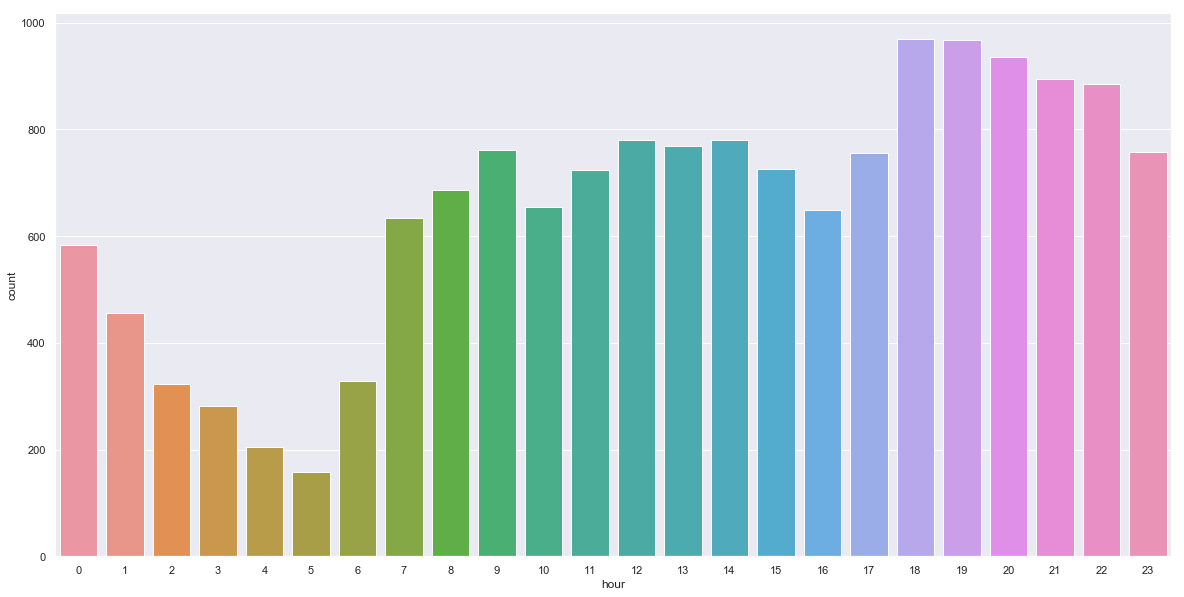

In [73]:
plt.figure(figsize=(20,10))
sns.countplot(j['hour'])

In [74]:
def f(x):
    ''' for sessions in a day using hour column '''
    if (x >=5) and (x <= 11):
        return 'morning'
    elif (x >=12) and (x <=16 ):
        return 'afternoon'
    elif (x >= 17) and (x <= 20):
        return'evening'
    elif (x >=21) and (x <= 23) :
        return 'night_PM'
    elif (x >=0) and (x <=4):
        return'night_AM'

In [75]:
def g(x):
    ''' for seasons in a year using month column'''
    if (x >=3) and (x <= 5):
        return 'spring'
    elif (x >=6) and (x <=8 ):
        return 'summer'
    elif (x >= 9) and (x <= 11):
        return'fall'
    elif (x >=12)|(x <= 2) :
        return 'winter'

In [76]:
def h(x):
    ''' for week:weekday/weekend in a day_of_week column '''
    if (x >=0) and (x <= 4):
        return 'weekday'
    elif (x >=5) and (x <=6 ):
        return 'weekend'

In [77]:
j['session'] = j['hour'].apply(f)
k['session'] = k['hour'].apply(f)
# train_nodummies['session'] = train_nodummies['hour'].apply(f)

In [78]:
j['seasons'] = j['month'].apply(g)
k['seasons'] = k['month'].apply(g)
 

In [79]:
j['week'] = j['day_of_week'].apply(h)
k['week'] = k['day_of_week'].apply(h)

In [80]:
j.shape

(15660, 14)

In [81]:
k.shape

(9914, 13)

In [82]:
# now feature_extraction for passenger_count varaible

j['passenger_count'].describe()

count     15660
unique        6
top           1
freq      11055
Name: passenger_count, dtype: int64

In [83]:
#Creating dummies for each variable in passenger_count and merging dummies dataframe to both train and test dataframe
temp = pd.get_dummies(j['passenger_count'], prefix = 'passenger_count')
j = j.join(temp)
temp = pd.get_dummies(k['passenger_count'], prefix = 'passenger_count')
k = k.join(temp)
temp = pd.get_dummies(j['seasons'], prefix = 'season')
j = j.join(temp)
temp = pd.get_dummies(k['seasons'], prefix = 'season')
k = k.join(temp)
temp = pd.get_dummies(j['week'], prefix = 'week')
j = j.join(temp)
temp = pd.get_dummies(k['week'], prefix = 'week')
k = k.join(temp)
temp = pd.get_dummies(j['session'], prefix = 'session')
j = j.join(temp)
temp = pd.get_dummies(k['session'], prefix = 'session')
k = k.join(temp)
temp = pd.get_dummies(j['year'], prefix = 'year')
j = j.join(temp)
temp = pd.get_dummies(k['year'], prefix = 'year')
k = k.join(temp)

In [84]:
j.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,...,session_morning,session_night_AM,session_night_PM,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,2009-06-15 17:26:21,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,...,0,0,0,1,0,0,0,0,0,0
1,2010-01-05 16:52:16,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,...,0,0,0,0,1,0,0,0,0,0
2,2011-08-18 00:35:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,...,0,1,0,0,0,1,0,0,0,0
3,2012-04-21 04:30:42,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,...,0,1,0,0,0,0,1,0,0,0
4,2010-03-09 07:51:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,...,1,0,0,0,1,0,0,0,0,0


In [85]:
j.columns

Index(['pickup_datetime', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'week_weekday', 'week_weekend', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM', 'year_2009',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015'],
      dtype='object')

In [86]:
j.shape

(15660, 38)

In [87]:
j=j.drop(['passenger_count_1','season_fall','week_weekday','session_afternoon','year_2009'],axis=1)


In [88]:
k=k.drop(['passenger_count_1','season_fall','week_weekday','session_afternoon','year_2009'],axis=1)

In [89]:
#Feature extraction for latitude and longitude variables

 
data = [j,k]
for i in data:
    i['great_circle']=i.apply(lambda x: great_circle((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)
    i['geodesic']=i.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)

In [90]:
j.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,...,session_night_AM,session_night_PM,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,great_circle,geodesic
0,2009-06-15 17:26:21,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,...,0,0,0,0,0,0,0,0,0.640488,0.639764
1,2010-01-05 16:52:16,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,...,0,0,1,0,0,0,0,0,5.250677,5.246511
2,2011-08-18 00:35:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,...,1,0,0,1,0,0,0,0,0.863412,0.863167
3,2012-04-21 04:30:42,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,...,1,0,0,0,1,0,0,0,1.739388,1.737223
4,2010-03-09 07:51:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,...,0,0,1,0,0,0,0,0,1.242220,1.241710


In [91]:
k.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,...,session_night_AM,session_night_PM,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,great_circle,geodesic
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,...,0,0,0,0,0,0,0,1,1.443609,1.442197
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,...,0,0,0,0,0,0,0,1,1.507047,1.506080
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,...,0,0,0,1,0,0,0,0,0.384398,0.384120
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,...,0,1,0,0,1,0,0,0,1.218531,1.217683
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,...,0,1,0,0,1,0,0,0,3.347519,3.344737


In [92]:
pd.DataFrame(j.isna().sum())

,0
pickup_datetime,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
month,0
day_of_week,0


In [93]:
pd.DataFrame(k.isna().sum())

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
month,0
day_of_week,0
hour,0


In [94]:
#removing unwanted variables

j=j.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week','great_circle'],axis=1)


In [95]:
k=k.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week','great_circle'],axis=1)

In [96]:
j.shape

(15660, 21)

In [97]:
k. shape

(9914, 20)

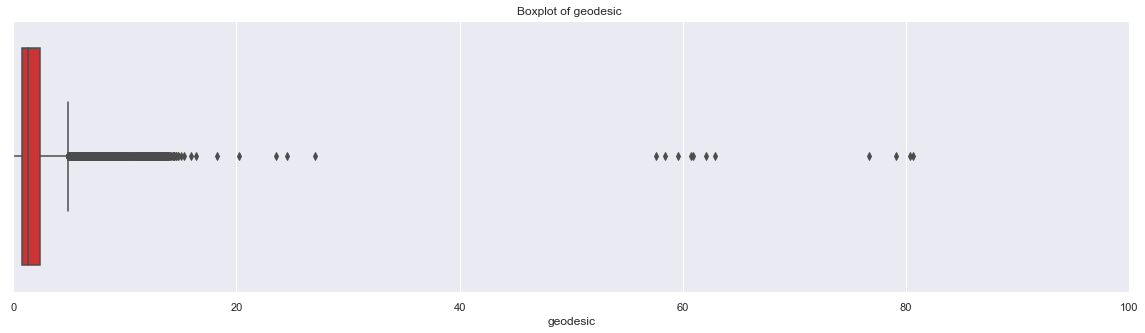

In [98]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=j['geodesic'],data=j,orient='h')
plt.title('Boxplot of geodesic ')
plt.show()

In [99]:
outlier_treatment('geodesic')

2.425668049965582 0.7815214474966259
-1.6846984562068081 4.891887953669016


pd.DataFrame(j.isnull().sum())

In [101]:
#Imputing with missing values using KNN
j = pd.DataFrame(KNN(k = 3).fit_transform(j), columns = j.columns, index=j.index)

Imputing row 1/15660 with 0 missing, elapsed time: 101.225
Imputing row 101/15660 with 0 missing, elapsed time: 101.719
Imputing row 201/15660 with 0 missing, elapsed time: 101.725
Imputing row 301/15660 with 1 missing, elapsed time: 101.728
Imputing row 401/15660 with 0 missing, elapsed time: 101.731
Imputing row 501/15660 with 0 missing, elapsed time: 101.735
Imputing row 601/15660 with 1 missing, elapsed time: 101.738
Imputing row 701/15660 with 0 missing, elapsed time: 101.742
Imputing row 801/15660 with 0 missing, elapsed time: 101.748
Imputing row 901/15660 with 0 missing, elapsed time: 101.750
Imputing row 1001/15660 with 0 missing, elapsed time: 101.754
Imputing row 1101/15660 with 1 missing, elapsed time: 101.757
Imputing row 1201/15660 with 0 missing, elapsed time: 101.760
Imputing row 1301/15660 with 0 missing, elapsed time: 101.763
Imputing row 1401/15660 with 0 missing, elapsed time: 101.768
Imputing row 1501/15660 with 0 missing, elapsed time: 101.769
Imputing row 1601/15

# Feature Selection

In [102]:
cat_var=['passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'season_spring', 'season_summer',
       'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015']


In [103]:
num_var=['fare_amount','geodesic']


In [104]:
j[cat_var]=j[cat_var].apply(lambda x: x.astype('category') )


In [105]:
k[cat_var]=k[cat_var].apply(lambda x: x.astype('category') ) 

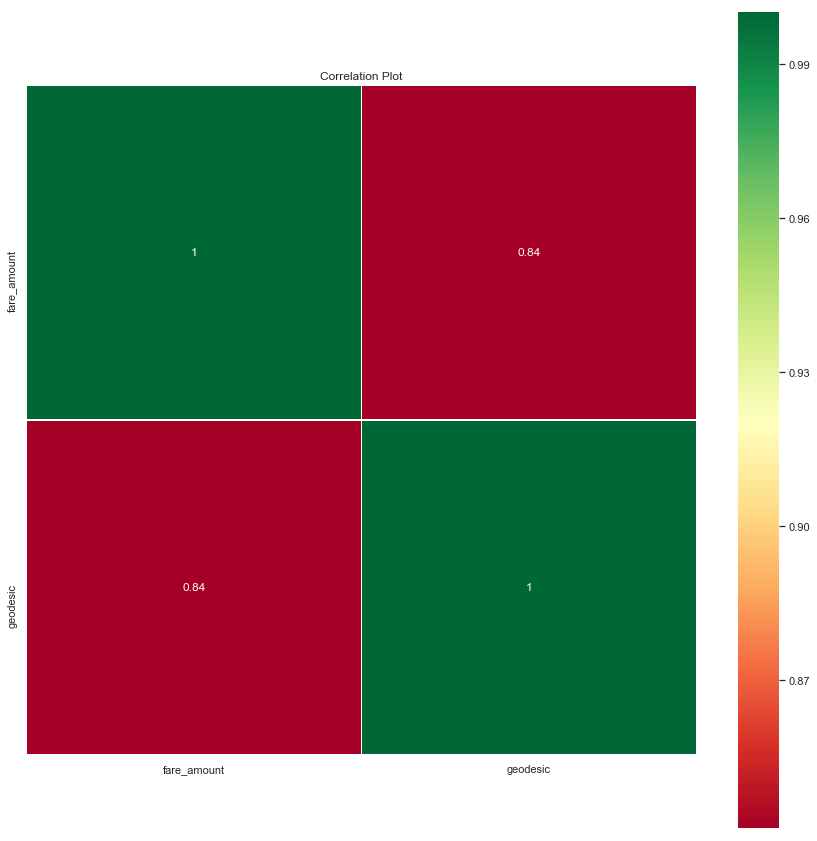

In [106]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(j[num_var].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation Plot')
# plt.savefig('correlation.png')
plt.show()

fare_amount and geodesic are corelated to each other

In [107]:
j.columns

Index(['fare_amount', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_spring', 'season_summer', 'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'geodesic'],
      dtype='object')

In [108]:
#Annova test




model = ols('fare_amount ~ C(passenger_count_2)+C(passenger_count_3)+C(passenger_count_4)+C(passenger_count_5)+C(passenger_count_6)+C(season_spring)+C(season_summer)+C(season_winter)+C(week_weekend)+C(session_night_AM)+C(session_night_PM)+C(session_evening)+C(session_morning)+C(year_2010)+C(year_2011)+C(year_2012)+C(year_2013)+C(year_2014)+C(year_2015)',data=j).fit()
aov_table = sm.stats.anova_lm(model)
 

In [109]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count_2),1.0,10.211738,10.211738,0.527319,4.677473e-01
C(passenger_count_3),1.0,17.010131,17.010131,0.878377,3.486610e-01
C(passenger_count_4),1.0,63.864841,63.864841,3.297883,6.938839e-02
C(passenger_count_5),1.0,21.361766,21.361766,1.103089,2.936054e-01
C(passenger_count_6),1.0,145.705549,145.705549,7.524011,6.095127e-03
C(season_spring),1.0,28.909259,28.909259,1.492830,2.217963e-01
C(season_summer),1.0,26.961287,26.961287,1.392240,2.380452e-01
C(season_winter),1.0,482.175550,482.175550,24.898807,6.106870e-07
C(week_weekend),1.0,131.096812,131.096812,6.769639,9.280899e-03
C(session_night_AM),1.0,2129.756471,2129.756471,109.977362,1.205681e-25


In [110]:
# _1+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6
outcome, predictors = dmatrices('fare_amount ~ geodesic+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6+season_spring+season_summer+season_winter+week_weekend+session_night_AM+session_night_PM+session_evening+session_morning+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015',j, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,15.268469,Intercept
1,1.040740,passenger_count_2[T.1.0]
2,1.019517,passenger_count_3[T.1.0]
3,1.011841,passenger_count_4[T.1.0]
4,1.024998,passenger_count_5[T.1.0]
5,1.017210,passenger_count_6[T.1.0]
6,1.642257,season_spring[T.1.0]
7,1.552425,season_summer[T.1.0]
8,1.587591,season_winter[T.1.0]
9,1.050819,week_weekend[T.1.0]


# Feature Scaling

In [111]:
j[num_var].var()  #num_var=['fare_amount','geodesic']


fare_amount    20.043732
geodesic        1.232397
dtype: float64

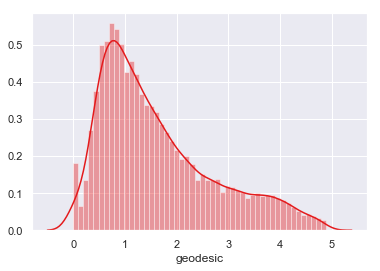

In [112]:
sns.distplot(j['geodesic'],bins=50)
 

((array([-3.92007182, -3.70085568, -3.58076887, ...,  3.58076887,
          3.70085568,  3.92007182]),
  array([0.        , 0.        , 0.        , ..., 4.88300333, 4.88468361,
         4.88875044])),
 (1.061852615888654, 1.6274749563025295, 0.956311159369912))

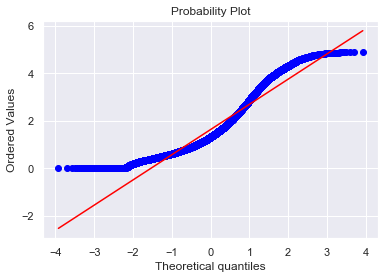

In [113]:
plt.figure()
stats.probplot(j['geodesic'], dist='norm', fit=True,plot=plt) 

In [114]:
names = ['geodesic']

In [115]:
#Nomalisation for j(train_data)
for i in names:
    print(i)
    j[i] = (j[i] - j[i].min())/(j[i].max() - j[i].min())

geodesic


In [116]:
#Nomalisation for k(test_data)
for i in names:
    print(i)
    k[i] = (k[i] - k[i].min())/(k[i].max() - k[i].min())

geodesic


In [117]:
 j['geodesic'].var()

0.05156498301058336

((array([-3.92007182, -3.70085568, -3.58076887, ...,  3.58076887,
          3.70085568,  3.92007182]),
  array([0.        , 0.        , 0.        , ..., 0.99882442, 0.99916812,
         1.        ])),
 (0.21720327684112845, 0.33290203197356816, 0.9563111593699122))

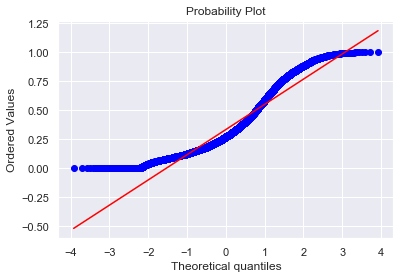

In [118]:
plt.figure()
stats.probplot(j['geodesic'], dist='norm', fit=True,plot=plt)
# plt.savefig('qq prob plot.png')

In [119]:
df = j

In [120]:
bf = k

In [121]:
j=j.drop(['passenger_count_2'],axis=1)


In [122]:
k=k.drop(['passenger_count_2'],axis=1)

In [123]:
j.columns

Index(['fare_amount', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'season_spring',
       'season_summer', 'season_winter', 'week_weekend', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'geodesic'],
      dtype='object')

# Spliting train and test data

In [131]:
#Divide data into train and test
train1, test1 = train_test_split(j, test_size=0.25)

In [134]:
X = j.drop('fare_amount',axis=1).values
y = j['fare_amount'].values


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print(j.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(15660, 20) (11745, 19) (3915, 19) (11745,) (3915,)


In [132]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11745 entries, 5363 to 14024
Data columns (total 20 columns):
fare_amount          11745 non-null float64
passenger_count_3    11745 non-null category
passenger_count_4    11745 non-null category
passenger_count_5    11745 non-null category
passenger_count_6    11745 non-null category
season_spring        11745 non-null category
season_summer        11745 non-null category
season_winter        11745 non-null category
week_weekend         11745 non-null category
session_evening      11745 non-null category
session_morning      11745 non-null category
session_night_AM     11745 non-null category
session_night_PM     11745 non-null category
year_2010            11745 non-null category
year_2011            11745 non-null category
year_2012            11745 non-null category
year_2013            11745 non-null category
year_2014            11745 non-null category
year_2015            11745 non-null category
geodesic             11745 non-nul

In [133]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3915 entries, 13559 to 14689
Data columns (total 20 columns):
fare_amount          3915 non-null float64
passenger_count_3    3915 non-null category
passenger_count_4    3915 non-null category
passenger_count_5    3915 non-null category
passenger_count_6    3915 non-null category
season_spring        3915 non-null category
season_summer        3915 non-null category
season_winter        3915 non-null category
week_weekend         3915 non-null category
session_evening      3915 non-null category
session_morning      3915 non-null category
session_night_AM     3915 non-null category
session_night_PM     3915 non-null category
year_2010            3915 non-null category
year_2011            3915 non-null category
year_2012            3915 non-null category
year_2013            3915 non-null category
year_2014            3915 non-null category
year_2015            3915 non-null category
geodesic             3915 non-null float64
dtypes: ca

In [125]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 
def test_scores(model):
    print('<<<------------------- Training Data Score --------------------->')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_train)
    scores(y_train,y_pred)
    print('RMSLE:',rmsle(y_train,y_pred))
    print()

# Using Multiple Linear Regression

In [143]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision reg classifier: reg
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')

# Fit it to the data
reg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.7355051757616463


R^2: 0.741981321673219
Root Mean Squared Error: 2.30008113621865
<<<------------------- Training Data Score --------------------->

r square   0.7343492368622104
Adjusted r square:0.7339187580136289
MAPE:18.72878576898836
MSE: 5.283392228399023
RMSE: 2.2985630790559184
RMSLE: 0.21655653152874277

[ 1.53944914e-01  2.24112858e-01  2.36501249e-01  2.17803915e-01
 -4.37983820e-01 -4.41241265e-01 -4.71926995e-01 -2.05252532e-01
 -4.00349573e-01 -4.54786564e-01 -6.74823938e-01 -7.88550669e-01
 -7.92801015e-02 -1.40703013e-02  4.33461953e-01  1.28741589e+00
  1.50701312e+00  1.74282303e+00  1.67258439e+01]


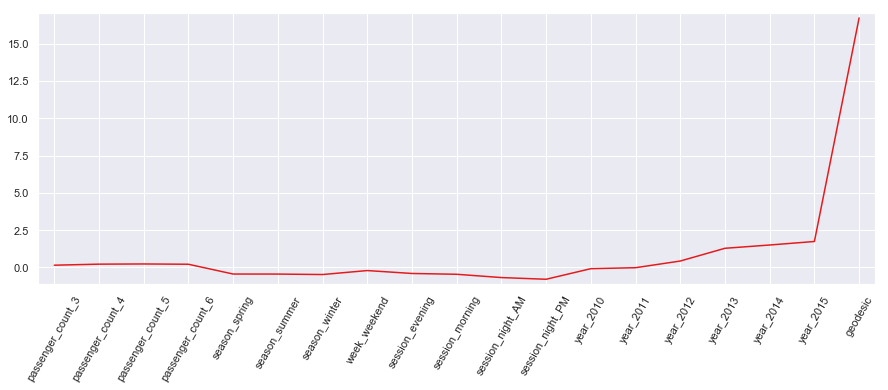

In [144]:
# Create the regressor: reg_all
reg_all = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
test_scores(reg_all)

# Compute and print the coefficients
reg_coef = reg_all.coef_
print(reg_coef)

# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(k.columns)), reg_coef)
plt.xticks(range(len(k.columns)), k.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()

In [145]:
from sklearn.model_selection import cross_val_score
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-5.30803394 -5.33651239 -5.10693899 -5.30180081 -5.42766408]
Average 5-Fold CV Score: -5.296190040877758


In [146]:
# Predicting the orginal test data using multiple linear Regression
y_pred1 = reg_all.predict(k)

In [147]:
multiple_Linear_Regression_Result  = pd.DataFrame(y_pred1)

In [148]:
multiple_Linear_Regression_Result.to_csv("E:/multiple_Linear_Regression_Result_Python.csv",index=False)

# Using Random Forest

In [150]:
RF_model1 = RandomForestRegressor(n_estimators = 1500).fit(train1.iloc[:,1:20], train1.iloc[:,0])


In [151]:
RF_Predictions1 = RF_model1.predict(test1.iloc[:,1:20])

In [152]:
test_scores(RF_model1)

<<<------------------- Training Data Score --------------------->

r square   0.8952104447007004
Adjusted r square:0.8950406364661003
MAPE:10.506490714588237
MSE: 2.084105897330101
RMSE: 1.4436432721867618
RMSLE: 0.13548985683030243



In [153]:
#Predicting on orginal test data

RF_Predictions = RF_model1.predict(b)

In [154]:
RF_Predictions = pd.DataFrame(RF_Predictions)

In [155]:
RF_Predictions.to_csv("E:/RandomForest_Regression_Result_Python.csv",index=False)

# Using Decision Tree

In [156]:

 
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train1.iloc[:,1:20], train1.iloc[:,0])



In [157]:
#Apply model on test data
predictions_DT = fit_DT.predict(test1.iloc[:,1:20])

In [158]:
test_scores(fit_DT)

<<<------------------- Training Data Score --------------------->

r square   0.6738027231459194
Adjusted r square:0.6732741305437677
MAPE:22.63189315433826
MSE: 6.487570888557376
RMSE: 2.5470710411288837
RMSLE: 0.2427260564922509



In [159]:
#Apply model on orginal test data
predictions_DT1 = fit_DT.predict(b)

In [160]:
predictions_DT1 = pd.DataFrame(predictions_DT1)

In [161]:
predictions_DT1.to_csv("E:/DecisionTree_Regression_Result_Python.csv",index=False)